## Plots for inequality analysis

M. Tsvetkova, **The effects of reputation on inequality in network cooperation games**, *Phil. Trans. B* (2021).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sb

import os
import sys

module_path = os.path.abspath(os.path.join('../modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from ineq import *
from plot import *
from concentration_library import gini


### 1. Define data function

In [2]:
def get_data(dirname, tmnts, version=None):   
    
    df = pd.read_csv('../data/'+dirname)   
    
    # Treat treatments as categorical data
    df['reputation'] = df['reputation'].astype('category')
    if version != None:
        df['version'] = df['version'].astype('category')
        df = df[(df['version']==version)]
    maxround = df.groupby(['reputation', 'group']).round.max()
    groups = df.groupby('reputation').group.unique()
    
    # Print unique number of groups and unique number of participants
    print(dirname[5:], df.group.unique().shape[0], df.player.unique().shape[0])
    
    gin = {i:[] for i in tmnts}
    coo = {i:[] for i in tmnts}
    cov = {i:[] for i in tmnts}
    for t in tmnts:
        for g in groups.loc[t]:
            subdf = df[(df.reputation==t) & (df.group==g) & (df['round']==maxround.loc[t, g])]
            if subdf.empty==False:
                 gin[t].append(gini(subdf['wealth'].values)) 
                 cov[t].append(coefvar(subdf['wealth'].values))
            subdf2 = df[(df.reputation==t) & (df.group==g)]
            if subdf2.empty==False:
                 coo[t].append(np.nanmean(subdf2['action'].values)) 
    
    return [gin[i] for i in tmnts], [coo[i] for i in tmnts], [cov[i] for i in tmnts]


### 2. Define plotting functions

In [3]:
def custom_text(ax, data, x, reverse=False):
    tests = []
    for i in data:
        tests.extend(mu_test(i, reverse=reverse))
    for i in range(len(tests)):
        ax.text(x[i], -0.06, get_text_for_test(tests[i], precision=1), fontsize=6, horizontalalignment='center')

        
def custom_axlim(ax, xlim, ylim, ylabel=None):
    if ylim=='Gini':
        ax.set_yticks([0, 0.1, 0.2, 0.3])
        ax.set_ylim(-0.07, 0.38)
    elif ylim=='Coef':
        ax.set_ylim(-5, 50)
    else:
        ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(xlim[0], xlim[1])
    if ylabel!=None: 
        ax.set_ylabel(ylabel, fontsize=6)

        
def get_legend_handles():
    rep0 = mpatches.Patch(color='1', label='reputation = 0', ec='k', lw=0.25)
    rep1 = mpatches.Patch(color='lightcoral', label='reputation = 1', ec='k', lw=0.25)
    rep3 = mpatches.Patch(color='red', label='reputation = 3', ec='k', lw=0.25)
    rep5 = mpatches.Patch(color='crimson', label='reputation = 5', ec='k', lw=0.25)
    rep6 = mpatches.Patch(color='darkred', label='reputation = 6', ec='k', lw=0.25)
    rep100 = mpatches.Patch(color='mediumvioletred', label='reputation = all', ec='k', lw=0.25)
    rep11 = mpatches.Patch(color='brown', label='reputation = 1+1', ec='k', lw=0.25)
    repavg = mpatches.Patch(color='darkviolet', label='reputation = avg', ec='k', lw=0.25)
    rep50 = mpatches.Patch(color='hotpink', label='reputation = part avg', ec='k', lw=0.25)
    replocavg = mpatches.Patch(color='orchid', label='reputation = local avg', ec='k', lw=0.25)
    return [rep0, rep1, rep3, rep5, rep6, rep100, rep11, repavg, rep50, replocavg]


def plot_rep_boxplots(rand, dyn, ylabel, fname):
    
    init_plot()
    f = plt.figure(figsize=(6.5, 3.6))
    ax12 = plt.subplot2grid((2, 4), (0, 1), colspan=2)
    ax2  = plt.subplot2grid((2, 4), (1, 0), colspan=4)

    ### RANDOM REWIRING ###
    xlabels = ['BOLT04', 'BOLT05a', 'BOLT05b', 'SEIN06']
    xticks = [1, 2, 3, 4]
    positions = [0.9, 1.1, 
                 1.8, 2, 2.2, 2.8, 3, 3.2,
                 3.9, 4.1]
    colors = ['1', 'mediumvioletred', 
            '1', 'lightcoral', 'brown', '1', 'lightcoral', 'brown',
             '1', 'darkred']

    y = [j for i in rand for j in i]
    custom_boxplot(ax12, y, positions, colors) 
    
    # Create legend
    ax12.legend(handles=get_legend_handles(), ncol=1, bbox_to_anchor=[1.2,0.95])

    # Add x-tick labels
    plt.setp(ax12, xticks=xticks, xticklabels=xlabels)
    custom_axlim(ax12, xlim=(0.6, 4.4), ylim=ylabel[:4], ylabel=ylabel)
    # Add test results
    x = [1, 1.85, 2.15, 2.85, 3.15, 4]
    custom_text(ax12, rand, x)
    # Add title
    ax12.set_title('A) Random rewiring')

    ### STRATEGIC UPDATING ###
    xlabels = ['CUES15',
               'KAME17a', 'KAME17b',
               'HARR18a', 'HARR18b',
               'MELA18a', 'MELA18b', 
               'MELA18c', 'MELA18d', 
               'MELA18e', 'MELA18f']
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    positions = [0.7, 0.9, 1.1, 1.3,
                 1.8, 2, 2.2, 2.8, 3, 3.2,
                 3.9, 4.1, 4.9, 5.1, 
                 5.8, 6, 6.2, 6.8, 7, 7.2,
                 7.8, 8, 8.2, 8.8, 9, 9.2,
                 9.8, 10, 10.2, 10.8, 11, 11.2]
    colors = ['1', 'lightcoral', 'red', 'crimson',
              '1', 'hotpink', 'darkviolet', '1', 'hotpink', 'darkviolet',
              '1', 'darkviolet', '1', 'darkviolet', 
              '1', 'orchid', 'darkviolet', '1', 'orchid', 'darkviolet',
              '1', 'orchid', 'darkviolet', '1', 'orchid', 'darkviolet',
              '1', 'orchid', 'darkviolet', '1', 'orchid', 'darkviolet']

    y = [j for i in dyn for j in i]
    custom_boxplot(ax2, y, positions, colors) 

    # Add x-tick labels
    plt.setp(ax2, xticks=xticks, xticklabels=xlabels)
    custom_axlim(ax2, xlim=(0.3, 11.5), ylim=ylabel[:4], ylabel=ylabel)
    # Add test results
    x = [0.6, 1, 1.4,
         1.8, 2.2, 2.8, 3.2,
         4, 5, 
         5.8, 6.2, 6.8, 7.2,
         7.8, 8.2, 8.8, 9.2,
         9.8, 10.2, 10.8, 11.2]
    custom_text(ax2, dyn, x)
    # Add title
    ax2.set_title('B) Strategic updating')

    plt.tight_layout(pad=1, w_pad=1, h_pad=3)
    plt.show()
    f.savefig('../plots/'+fname+'.pdf', format='pdf', bbox_inches='tight')
    

### 3. Plot

n04_data.csv 6 16
n05_data.csv 6 16
n05_data.csv 6 16
n_data.csv 8 28
a_data.csv 11 243
_data.csv 12 120
_data.csv 13 130
ll_data.csv 20 330
ll_data.csv 20 328
ed_data.csv 15 365
ed_data.csv 15 393
ed_data.csv 15 363
ed_data.csv 15 384
ed2_data.csv 16 361
ed2_data.csv 14 335


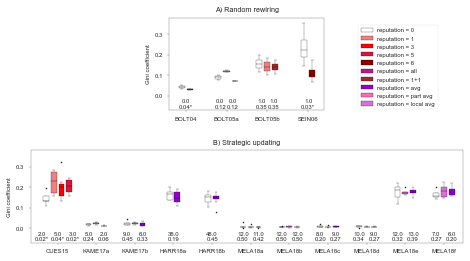

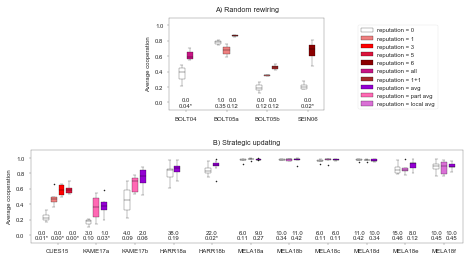

In [4]:
# First get data
T = ['reputation = 0', 'reputation = 1']
T_B4 = ['reputation = 0', 'reputation = 100%']
T_B5 = ['reputation = 0', 'reputation = 1', 'reputation = 1+1']
T_C = ['reputation = 0', 'reputation = 1', 'reputation = 3', 'reputation = 5']
T_K = ['reputation = 0', 'reputation = 50%', 'reputation = 100%']
T_S = ['reputation = 0', 'reputation = 6']
T_H = ['reputation = 0', 'reputation = 100%']
T_M = ['reputation = 0', 'reputation = local', 'reputation = global']

# RANDOM REWIRING
bolt04, cbolt04, cvbolt04 = get_data('bolton04_data.csv', T_B4)
bolt05_a, cbolt05_a, cvbolt05_a = get_data('bolton05_data.csv', T_B5, version='low cost')
bolt05_b, cbolt05_b, cvbolt05_b = get_data('bolton05_data.csv', T_B5, version='high cost')
sein, csein, cvsein = get_data('seinen_data.csv', T_S)
g_rand = [bolt04, bolt05_a, bolt05_b, sein]
c_rand = [cbolt04, cbolt05_a, cbolt05_b, csein]
cv_rand = [cvbolt04, cvbolt05_a, cvbolt05_b, cvsein]
    
# STRATEGIC UPDATING
cues, ccues, cvcues = get_data('cuesta_data.csv', T_C)
kame_a, ckame_a, cvkame_a = get_data('kamei_data.csv', T_K, version='low gain')
kame_b, ckame_b, cvkame_b = get_data('kamei_data.csv', T_K, version='high gain')
harr_a, charr_a, cvharr_a = get_data('harrell_data.csv', T_H, version='mixed')
harr_b, charr_b, cvharr_b = get_data('harrell_data.csv', T_H, version='dynamic')
mela_a, cmela_a, cvmela_a = get_data('melamed_data.csv', T_M, version='non-targeted, random')
mela_b, cmela_b, cvmela_b = get_data('melamed_data.csv', T_M, version='non-targeted, clustered')
mela_c, cmela_c, cvmela_c = get_data('melamed_data.csv', T_M, version='targeted, random')
mela_d, cmela_d, cvmela_d = get_data('melamed_data.csv', T_M, version='targeted, clustered')
mela_e, cmela_e, cvmela_e = get_data('melamed2_data.csv', T_M, version='non-targeted, random')
mela_f, cmela_f, cvmela_f = get_data('melamed2_data.csv', T_M, version='targeted, random')
g_dyn = [cues, kame_a, kame_b, harr_a, harr_b, mela_a, mela_b, mela_c, mela_d, mela_e, mela_f]
c_dyn = [ccues, ckame_a, ckame_b, charr_a, charr_b, cmela_a, cmela_b, cmela_c, cmela_d, cmela_e, cmela_f]
cv_dyn = [cvcues, cvkame_a, cvkame_b, cvharr_a, cvharr_b, cvmela_a, cvmela_b, cvmela_c, cvmela_d, cvmela_e, cvmela_f]

# Plot inequality with Gini coefficient
plot_rep_boxplots(g_rand, g_dyn, "Gini coefficient", 'fig_3')
# Plot inequality with coefficient of variation
# Too large range to be able to show on one plot but the results are qualitatively the same
#plot_rep_boxplots(cv_rand, cv_stat, cv_dyn, "Coefficient of variation", 'plots/coefvar.pdf', legend_anchor=[1, 1])


# Plot average cooperation level per group
plot_rep_boxplots(c_rand, c_dyn, "Average cooperation", 'fig_s1')
